<img src="Figs\ul_logo.png" alt="ul_logo" align="left" width="200" height="100"/>

<br/><br/><br/><br/>
<h3><center> Cahier de laboratoire </center></h3><br/><br/><br/><br/><br/>
    
<center> Travaux pratiques avancés (GPH-3000) </center> <br /><br/><br/><br/><br/><br/>

<center> présenté à </center>
<center> Simon Rainville et Michel Piché </center> <br /><br/><br/><br/><br/><br/>

<center> par </center>
<center> Maxence Larose (111 188 447 - maxence.larose.1@ulaval.ca) </center>
<center> Pierre-Olivier Janvier (111 187 987 - pierre-olivier.janvier.1@ulaval.ca) </center><br /><br/><br/><br/><br/><br/><br/>

<center> Automne 2020 </center><br/><br/><br/>

<div style="page-break-after: always;"></div>

# Expérience 7 : Room acoustique

Protocole de laboratoire disponible dans le répertoire sur Github [ici](https://github.com/FELED1/roomacoustics).

## Préparation

**Date de préparation :** 21 octobre 2020

**Date de l'expérimentation :** 22 octobre 2020

**But :** Étudier la propagation de l'acoustique dans différentes milieux et environnements ainsi que de se familiariser avec les simulations de différents phénomènes physiques.

**Objectifs spécifiques :**
- Mesurer des coefficients liés à la propagation des ondes acoustiques dans l'air.
- Comparer les résultats obtenus en simulation avec des résultats expérimentaux qui seront prises à l'aide d'un cellulaire.
- Concevoir une pière qui permettra de porter les voix humaine tout en atténuant les sons provenant des machines dans un contexte industriel.
- Développer un protocole qui a pour but la mesure du coefficient d'absorption et de diffusion d'un mur.

**Matériel nécessaire :**
- Python3 avec package Pyroomacoustics
- librairies de visual studio

**Théorie :**
Tout d'abord, l'équation de la pression sonore instantannée d'une onde acoustique est donnée par
$$
p(\omega, \boldsymbol{R})=\frac{\exp (i \omega(\boldsymbol{R} / c-t))}{4 \pi \boldsymbol{R}}
$$
où $p$ est la pression sonore instantannée, $R$ est la distance par rapport à la source, $\omega$ est la fréquence de l'onde, t est le temps et c est la vitesse du son dans le milieu. Ensuite, la pression sonore efficace est donnée par
$$
p_{e f f}=\sqrt{\frac{1}{t_{i}} \int_{t-t_{i}}^{t} p^{2}(t) d t}
$$
où $t_i$ est le temps sur laquelle la mesure est prise. Finalement, la valeur en dB du niveau sonore est donnée par
$$
N=20 \cdot \log _{10}\left(\frac{p_{e f f}}{p_{\text {ref}}}\right)
$$
où N est le niveau sonore en dB et $p_{ref}$ est de 20$~\mu$Pa

## Réalisation

### Partie 1
Afin d'étudier les différents comportement de la propagation d'ondes acoustiques dans des pièces, les différentes questions suivantes sont répondues à l'aide de la programmation en python et à l'aide de différentes librairies telles que PyRoomAcoustics, Numpy, MatPlotLib et Scipy. Chaque énoncé est répondu respectivement aux questions 1,2,3 et 4 qui sont disponibles dans le protocole sur Github.
## Q1 
1. Calculez le niveau sonore:
   1. Quel est le niveau sonore moyen (en dB) le long de la trace d'entrée et de sortie?
   2. Quelle fraction de l'énergie sonore est transmise entre la source et la réception?
   3. Faites un graphique du niveau sonore (en dB) en fonction du temps de la trace de l'entrée et celle de sortie pour un temps d'intégration de 0.1 secondes.
   4. Si l'incertitude sur une valeur de pression moyenne de 0.3 Pa est de 5% et que le taux d'échantillonage du micro est de 62.5 us (microsecondes). Quelle est l'incertitude sur le niveau sonore (en dB) si le temps d'intégration est de 0.1s? Qu'en est-il de si le temps d'intégration est de 1s?

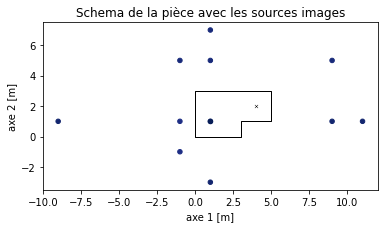

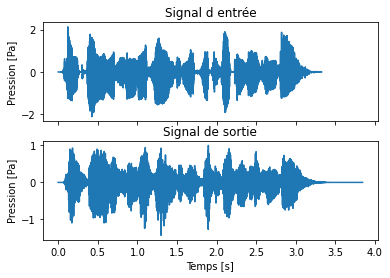

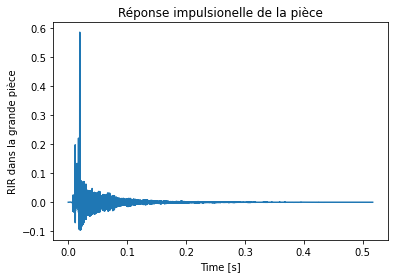

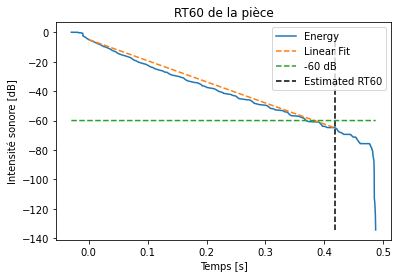

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pyroomacoustics as pra
import IPython


# Je commence par définir un fichier à lire (qui est dans le dossier du code) qui donne deux informations:
# le signal et la fréquence d'echantillonage
fs, signal_in = wavfile.read("arctic_a0010.wav")

# Définir la pièce avec ses materiaux
corners = np.array([[0, 0], [0, 3], [5, 3], [5, 1], [3, 1], [3, 0]]).T  # [x,y]
wall_absorption = 0.2
wall_scattering = 0.1
m = pra.Material(wall_absorption, wall_scattering)

# l'ordre de la simulation est définit ici
simulation_order = 2

#création de la pièce
room = pra.Room.from_corners(corners, fs=fs, max_order=simulation_order, materials=m, ray_tracing=True, air_absorption=True)

# Ajouter une source et un microphone
X_source = [1, 1]
room.add_source(X_source, signal=signal_in)
X_micro = np.array([[4], [2]])  # [[x], [y], [z]]
room.add_microphone(X_micro)

# Ajuster les paramètres du tracer de rayon
room.set_ray_tracing(receiver_radius=2, n_rays=10000, energy_thres=1e-5)

# calcule les sources images
room.image_source_model();

# trace un schema de la situation
fig, ax = room.plot(img_order=simulation_order)
plt.title('Schema de la pièce avec les sources images')
plt.xlabel('axe 1 [m]')
plt.ylabel('axe 2 [m]')

# Signaux d'entree et de sortie
room.simulate()

# Cette partie sert à convertir les signaux en pression réaliste. Sinon, ces vecteurs sont uniquement des fichiers .wav.
signal_in = np.array(signal_in)/1e4
signal_out = np.array(room.mic_array.signals[0, :])/2e4

# On met en graphique les signaux d'entree et de sortie
dt = 1/fs
fig, ax = plt.subplots(2, 1, sharex=True)
timeIn = np.linspace(0, dt*(len(signal_in)), len(signal_in))
ax[0].plot(timeIn, signal_in)
ax[0].set_ylabel('Pression [Pa]')
ax[0].set_title('Signal d entrée')

timeOut = np.linspace(0, dt*(len(signal_out)), len(signal_out))
ax[1].plot(timeOut, signal_out)
ax[1].set_ylabel('Pression [Pa]')
ax[1].set_title('Signal de sortie')
ax[1].set_xlabel('Temps [s]')

# faire un graphique de la RIR
plt.figure()
signal_rir = room.rir[0][0]
time = np.linspace(0, dt*(len(signal_rir)), len(signal_rir))
plt.ylabel('RIR dans la grande pièce')
plt.plot(time, signal_rir)
plt.xlabel('Time [s]');
plt.title('Réponse impulsionelle de la pièce')

# Le RT60 est une mesure du temps de réverberation de la pièce. Il équivault au temps lorsque le son est 60dB
# de moins que l'intensité sonore maximale.
plt.figure()
plt.title('RT60 de la pièce', fontsize=12)
plt.xlabel('Temps [s]')
plt.ylabel('Intensité sonore [dB]')
rt60 = room.measure_rt60(plot=True)

### Q1 a) 

In [2]:
ti_in = dt*len(signal_in)
ti_out = dt*len(signal_out)

p_eff_in = np.sqrt(1/ti_in*np.trapz(signal_in**2, dx=dt))
p_eff_out = np.sqrt(1/ti_out*np.trapz(signal_out**2, dx=dt))

# print(pra.utilities.rms(signal_in))

N_in = 20*np.log10(p_eff_in/(20*10**-6))
N_out = 20*np.log10(p_eff_out/(20*10**-6))

print("Niveau sonore du signal d'entrée = ", N_in, " dB")
print("Niveau sonore du signal de sortie = ", N_out, " dB")

Niveau sonore du signal d'entrée =  84.28685576430313  dB
Niveau sonore du signal de sortie =  80.04030733910375  dB


### Q1 b) ##

In [3]:
fraction = p_eff_out/p_eff_in
print("Fraction de l'énergie transmise = ", fraction)

Fraction de l'énergie transmise =  0.6132994549747165


### Q1 c) 

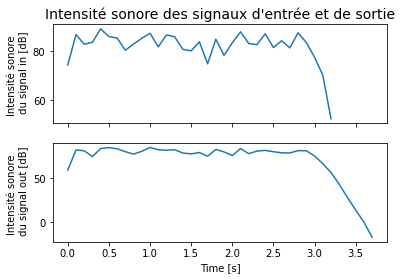

In [4]:

ti = 0.1
n_sample = int(0.1/dt)
N_in_list = []
N_out_list = []

for i in range(len(signal_in)//n_sample):
    signal_sample = signal_in[i*n_sample:(i+1)*n_sample]
    p_eff = np.sqrt(1/ti*np.trapz(signal_sample**2, dx=dt))
    N = 20*np.log10(p_eff/(20*10**-6))
    N_in_list.append(N)
    
for i in range(len(signal_out)//n_sample):
    signal_sample = signal_out[i*n_sample:(i+1)*n_sample]
    p_eff = np.sqrt(1/ti*np.trapz(signal_sample**2, dx=dt))
    N = 20*np.log10(p_eff/(20*10**-6))
    N_out_list.append(N)

time_in = np.arange(0, ti*len(N_in_list), ti)
time_out = np.arange(0, ti*len(N_out_list), ti)

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].set_ylabel("Intensité sonore \n du signal in [dB]")
ax[0].plot(time_in, N_in_list);
ax[0].set_title("Intensité sonore des signaux d'entrée et de sortie", fontsize=14)
ax[1].set_ylabel("Intensité sonore \n du signal out [dB]")
ax[1].plot(time_out, N_out_list)
ax[1].set_xlabel('Time [s]');


### Q1 d)

Le nombre de points $n$ utilisé pour déterminer la pression sonore efficace est de
$$
n = \frac{ti}{dt}.
$$

Le nombre de points utilisé avec un temps d'intégration de 0.1 s est donc

$$
n = \frac{0.1 s}{62.5 \mu s} = 1600.
$$

et de 16000 pour un temps d'intégration de 1 s. Sachant que le calcul de la pression efficace est un calcul de valeur RMS, on sait que l'incertitude varie en fonction de la racine carrée du nombre de points utilisé pour le calcul. On a donc 

$$
\Delta \text{RMS} \propto \frac{1}{\sqrt{n}}
$$

L'incertitude pour un temps d'intégration de 0.1 s est donc de 

$$
\Delta \text{RMS} = \frac{5~\%}{\sqrt{1600}} = 0.125~\% = \frac{0.125 \times 0.3}{100} = 0.000375~\text{Pa}.
$$

et, pour un temps d'intégration de 1 s, de

$$
\Delta \text{RMS} = \frac{5~\%}{\sqrt{16 000}} = 0.03953~\% = \frac{0.03953 \times 0.3}{100} = 0.0001186~\text{Pa}.
$$

Le niveau sonore est calculé avec

$$
N=20 \cdot \log _{10}\left(\frac{p_{e f f}}{p_{\text {ref}}}\right)
$$

et l'incertitude est donc donnée par

$$
\Delta N = 20 \times 0.434 \left( \frac{\Delta \text{RMS}}{p_{e f f}} \right).
$$

On a donc $\Delta N = 0.01~\text{dB}$ pour un temps d'intégration de 0.1 s et $\Delta N = 0.003~\text{dB}$ pour un temps d'intégration de 1 s.

## Q2
Décrivez par quelles opérations matématiques il est possible de calculer le RT60.

Tout d'abord, on calcule la fonction de transfert de la pièce. Ensuite, le gain de cette fonction de transfert est tracé en fonction du temps. Ce gain est converti en dB à l'aide de l'équation du niveau sonore et la valeur à laquelle le gain est égale à -60 dB est déterminée.

## Q3
Faites une transformée de fourier de votre signal de sortie. Dans quelle intervalle de fréquence est-ce que la majorité de votre signal se trouve? Est-ce typique d'une voix humaine? Comment faire pour obtenir la fréquence du signal en fonction du temps?

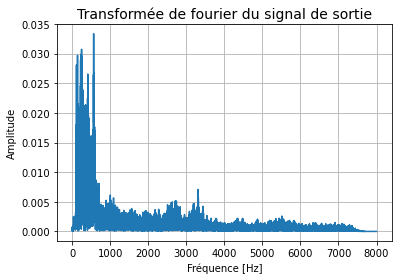

In [5]:
from scipy.fft import fft
# Number of sample points
N = len(signal_in)
# sample spacing
T = dt
x = np.linspace(0.0, N*T, N)
yf = fft(signal_in)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlabel("Fréquence [Hz]")
plt.ylabel('Amplitude')
plt.title('Transformée de fourier du signal de sortie', fontsize=14)
plt.grid()
plt.show()

Oui, la majorité du signal se trouve entre 100 à 600 Hz. Ces fréquences concordent avec celles de la voix humaine. On remarque que des fréquences très hautes sont présentes dans le signal. Celles-ci peuvent provenir de bruits environnants qui ne sont pas humains.

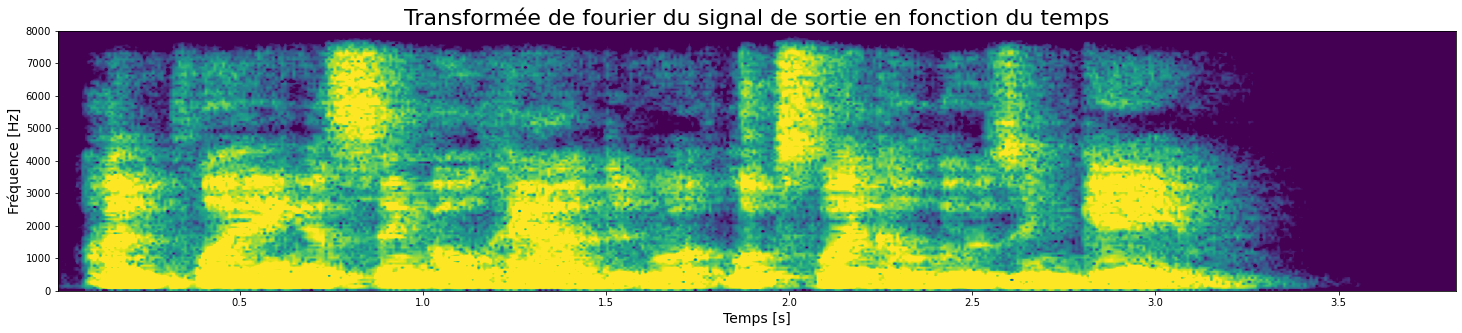

In [6]:
signal_out_original = signal_out*2e4

# stft parameters
n = 0
h_len = 50
fft_len = 512
block_size = fft_len - h_len + 1  # make sure the FFT size is a power of 2
hop = block_size // 2  # half overlap

processed_audio = np.zeros(signal_out_original.shape)
    
# plot the spectrogram before and after filtering
fig = plt.figure()
fig.set_size_inches(20, 8)
plt.subplot(2,1,1)
plt.specgram(signal_out_original[:n-hop].astype(np.float32), NFFT=256, Fs=fs, vmin=-20, vmax=30)
plt.title('Transformée de fourier du signal de sortie en fonction du temps', fontsize=22)
plt.tight_layout(pad=0.5)
plt.xlabel('Temps [s]',fontsize=14)
plt.ylabel('Fréquence [Hz]',fontsize=14)
plt.show()

Avec la documentation de PyRoomAcoustics et l'utilisation de la fonction STFT, il a été possible de faire la transformée de fourier sur le signal de sortie en fonction du temps.

## Q4 
Questions sur les simulations: 

1. Qu'est-ce l'ordre de l'image (img_order) et quelle est son influence sur vos résultats? 

L'ordre d'image correspond au maximum d'ordre de réflexion que la simulation utilise pour créer d'autres sources images. Plus l'ordre d'image est élevé, plus les résultats seront conformes à la réalité. Toutefois, un grand nombre d'image demande beaucoup de temps de calcul.

2. Dans quelles situations est-ce que le nombre de rayons importe? 

Plus le nombre de rayons est grand, plus la simulation sera précise. Ainsi le nombre de rayons importe lorsqu'on désire avoir une bonne précision. De plus, si la salle possède une géométrie complexe, il se peut que plus de rayons soit nécessaire pour qu'une assez grande quantité de rayons atteigne la cible (le microphone) avec une énergie suffisante. La méthode par raytracing permet de mieux capture les réflexions d'ordre plus élevée et de modéliser des effets tel que la diffusion.

3. Résumez, dans vos mots, comment fonctionne la simulation, c'est-à-dire, comment est-ce que la RIR est formée à partir d'une pièce donnée? 

La simulation est un modèle hybride qui utilise deux modèles de manière conjointe, soit la méthode de sources images et de "raytracing". La méthode par sources images va calculer la position de différentes sources tel que vu par le microphone. La réponse impulsionnelle de la pièce peut ensuite être calculée en sommant la réponse causée par chaque source image lorsqu'elles envoient une impulsion. La méthode raytracing, elle, va envoyer un très grand nombre de rayons à partir de la source à des angles différents. Chacun des rayons portent une impulsion et la réponse impulsionnelle de la pièce est donnée par la somme de chacun des rayons qui atteigne le microphone.

### Partie 2

Pour cette partie, nous avons décider de modéliser deux chambres, soit l'une qui atténuera le plus possible le son provenant d'une souce (en réduisant les échos) et une qui amplifiera le plus possible ce son (en favorisant les échos). Le but ici est de travailler essentiellement avec la géométrie des chambres en 3D et de faire preuve de créativité pour créer une chambre correspondante à nos besoins. Le matériel de ces deux chambres sera évidemment le même, soit une chambre avec des murs avec un coefficient d'absorption de 0.2 et un coefficient de diffusion de 0.1.

#### Chambre à échos

On crée d'abord la géométrie de la chambre qui favorise la propagation des échos jusqu'au microphone. Une géométrie circulaire semble être un bon point de départ. On utilise donc un triacontagone (polygone à 30 sommets) pour approximer une forme de chambre circulaire. 

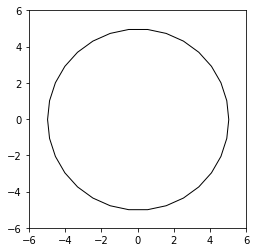

In [7]:
n_corners = 30
angle_deg_list = np.linspace(0, 360, n_corners + 1)
angle_rad_list = np.deg2rad(angle_deg_list)[:-1]

room_radius = 5

corners_list = []

for idx, angle_rad in enumerate(angle_rad_list):
    x_position = np.round(room_radius*np.cos(angle_rad), 5)
    y_position = np.round(room_radius*np.sin(angle_rad), 5)
    
    corners_list.append([x_position, y_position])
    
corners = np.array(corners_list).T

fs, signal_in = wavfile.read("arctic_a0010.wav")
wall_absorption = 0.2
wall_scattering = 0.1
m = pra.Material(wall_absorption, wall_scattering)
simulation_order = 3

room = pra.Room.from_corners(corners, fs=fs, max_order=simulation_order, materials=m, ray_tracing=True, air_absorption=True)

fig, ax = room.plot()
ax.set_xlim([-room_radius - 1, room_radius + 1])
ax.set_ylim([-room_radius - 1, room_radius + 1]);

On utilise ensuite une extrusion sur la forme 2D pour modéliser la chambre en 3D.

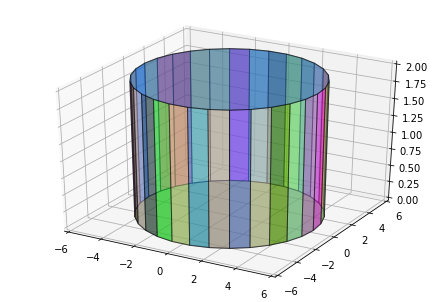

In [8]:
room = pra.Room.from_corners(corners)
room_height = 2
room.extrude(room_height, materials=m)

fig, ax = room.plot()
ax.set_xlim([-room_radius - 1, room_radius + 1])
ax.set_ylim([-room_radius - 1, room_radius + 1]);
ax.set_zlim([0, room_height]);

On utilise une source à la position (0,0,1) m et un microphone à (3, 0, 1) m.

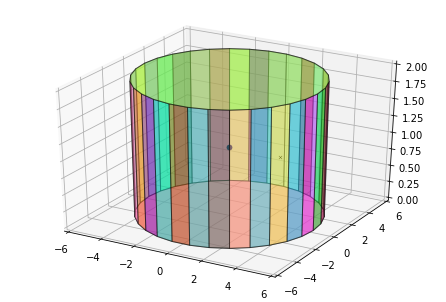

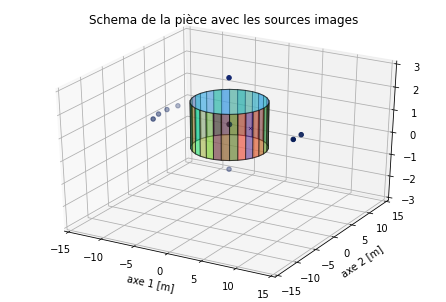

In [9]:
# Ajouter une source et un microphone
X_source = [0., 0., 1.]
room.add_source(X_source, signal=signal_in)
X_micro = np.array([[3], [0], [1]])  # [[x], [y], [z]]
room.add_microphone(X_micro)
fig, ax = room.plot()
ax.set_xlim([-room_radius - 1, room_radius + 1])
ax.set_ylim([-room_radius - 1, room_radius + 1]);
ax.set_zlim([0, room_height]);

# Ajuster les paramètres du tracer de rayon
room.set_ray_tracing(receiver_radius=2, n_rays=10000, energy_thres=1e-5)

# calcule les sources images
room.image_source_model()

# trace un schema de la situation
fig, ax = room.plot(img_order=simulation_order)
plt.title('Schema de la pièce avec les sources images')
plt.xlabel('axe 1 [m]')
plt.ylabel('axe 2 [m]')
ax.set_xlim([-room_radius - 10, room_radius + 10])
ax.set_ylim([-room_radius - 10, room_radius + 10]);
ax.set_zlim([-3, 3]);

On simule et on trouve la réponse impulsionnelle de la chambre. Le temps de réverbation de la pièce (RT60) est aussi tracé.

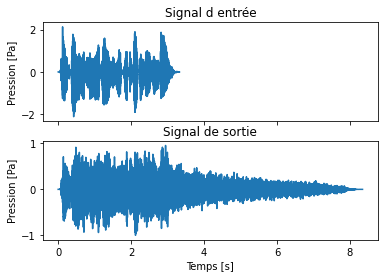

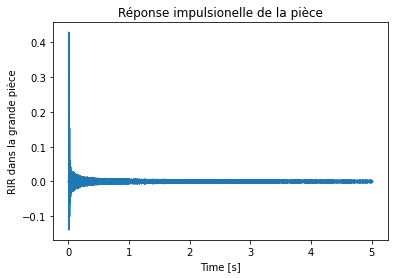

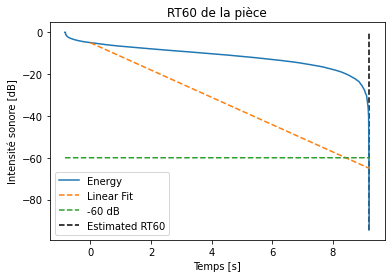

Niveau sonore du signal d'entrée =  84.28685576430313  dB
Niveau sonore du signal de sortie =  77.62205590017876  dB
Fraction de l'énergie transmise =  0.46425865277364253


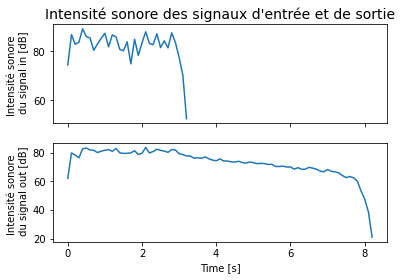

In [10]:
# Signaux d'entree et de sortie
room.simulate()

# Cette partie sert à convertir les signaux en pression réaliste. Sinon, ces vecteurs sont uniquement des fichiers .wav.
signal_in = np.array(signal_in)/1e4
signal_out = np.array(room.mic_array.signals[0, :])/2e4

# On met en graphique les signaux d'entree et de sortie
dt = 1/fs
fig, ax = plt.subplots(2, 1, sharex=True)
timeIn = np.linspace(0, dt*(len(signal_in)), len(signal_in))
ax[0].plot(timeIn, signal_in)
ax[0].set_ylabel('Pression [Pa]')
ax[0].set_title('Signal d entrée')

timeOut = np.linspace(0, dt*(len(signal_out)), len(signal_out))
ax[1].plot(timeOut, signal_out)
ax[1].set_ylabel('Pression [Pa]')
ax[1].set_title('Signal de sortie')
ax[1].set_xlabel('Temps [s]')

# faire un graphique de la RIR
plt.figure()
signal_rir = room.rir[0][0]
time = np.linspace(0, dt*(len(signal_rir)), len(signal_rir))
plt.ylabel('RIR dans la grande pièce')
plt.plot(time, signal_rir)
plt.xlabel('Time [s]');
plt.title('Réponse impulsionelle de la pièce')

# Le RT60 est une mesure du temps de réverberation de la pièce. Il équivault au temps lorsque le son est 60dB
# de moins que l'intensité sonore maximale.
plt.figure()
plt.title('RT60 de la pièce', fontsize=12)
plt.xlabel('Temps [s]')
plt.ylabel('Intensité sonore [dB]')
rt60 = room.measure_rt60(plot=True)

# Niveau sonore
ti_in = dt*len(signal_in)
ti_out = dt*len(signal_out)

p_eff_in = np.sqrt(1/ti_in*np.trapz(signal_in**2, dx=dt))
p_eff_out = np.sqrt(1/ti_out*np.trapz(signal_out**2, dx=dt))

N_in = 20*np.log10(p_eff_in/(20*10**-6))
N_out = 20*np.log10(p_eff_out/(20*10**-6))

print("Niveau sonore du signal d'entrée = ", N_in, " dB")
print("Niveau sonore du signal de sortie = ", N_out, " dB")
fraction = p_eff_out/p_eff_in
print("Fraction de l'énergie transmise = ", fraction)

# Intensité 
ti = 0.1
n_sample = int(0.1/dt)
N_in_list = []
N_out_list = []

for i in range(len(signal_in)//n_sample):
    signal_sample = signal_in[i*n_sample:(i+1)*n_sample]
    p_eff = np.sqrt(1/ti*np.trapz(signal_sample**2, dx=dt))
    N = 20*np.log10(p_eff/(20*10**-6))
    N_in_list.append(N)
    
for i in range(len(signal_out)//n_sample):
    signal_sample = signal_out[i*n_sample:(i+1)*n_sample]
    p_eff = np.sqrt(1/ti*np.trapz(signal_sample**2, dx=dt))
    N = 20*np.log10(p_eff/(20*10**-6))
    N_out_list.append(N)

time_in = np.arange(0, ti*len(N_in_list), ti)
time_out = np.arange(0, ti*len(N_out_list), ti)

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].set_ylabel("Intensité sonore \n du signal in [dB]")
ax[0].plot(time_in, N_in_list);
ax[0].set_title("Intensité sonore des signaux d'entrée et de sortie", fontsize=14)
ax[1].set_ylabel("Intensité sonore \n du signal out [dB]")
ax[1].plot(time_out, N_out_list)
ax[1].set_xlabel('Time [s]');

On remarque d'abord que le signal de sortie est plus de 2 fois plus long que le signal d'entrée. Cela montre bien qu'une grande quantité d'échos sont présents dans le signal et que la chambre accomplie bien le but espéré. On peut valider cette affirmation en observant, sur la figure de RT60 de la pièce, que l'énergie diminue très lentement. En fait, la fit linéaire ne réussit pas à bien approximer le comportement de la chambre. Finalement, sur le graphique de l'intensité du signal d'entrée et de sortie, on remarque que l'intensité prend une longue période à diminuer pour le signal de sortie. Les deux signaux peuvent être écoutés ici :

In [11]:
# original signal
print("Original :")
IPython.display.Audio(signal_in, rate=fs)

Original :


In [12]:
print("Simulated propagation to first mic:")
IPython.display.Audio(signal_out, rate=fs)

Simulated propagation to first mic:


#### Chambre anti-echo:
Tout d'abord, la géométrie de la salle est décidée afin de réduire le plus possible les échos. On choisit alors d'ajouter des "spikes" sur les murs de la chambre afin d'éliminer les échos résultants des murs de la salle. Avec cette configuration, on devrait alors obtenir une grande diminution en amplitude des signaux provenants des rebonds. Ci-dessous, un exemple de la configuration 2D et 3D de la salle est présentée. Les "spikes" utilisés dans ce cas-ci possède une hauteur de 2m et une largeur de 0.5m.

20


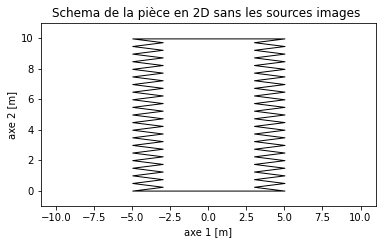

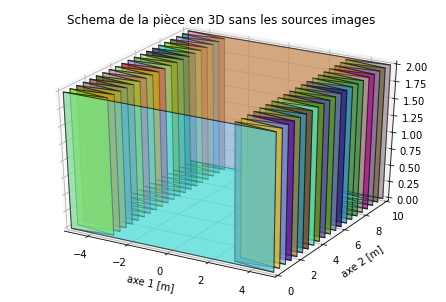

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pyroomacoustics as pra
import IPython

roomH = 10
roomL = 10
Lspike = 0.5
Hspike = 2
coordlist = []
nspikes = int(roomH/Lspike)
print(nspikes)

for i in range(nspikes):    
    Xw = -roomL/2
    Yw = i*Lspike
    Xs = Xw + Hspike
    Ys = Yw + Lspike/2
    coordw = [Xw,Yw]
    coords = [Xs,Ys]
    coordlist.append(coordw)
    coordlist.append(coords)
    if i == (nspikes-1):    
        coordlist.append([Xw,(i+1)*Lspike])
    else:
        pass


coordlist = np.array(coordlist)
coordlist2 = coordlist.copy()
for i in range(len(coordlist)):
    coordlist2[i][0] = coordlist[i][0] * -1

coordlist2 = coordlist2[::-1]
coordt = np.asarray(np.append(coordlist,coordlist2, axis = 0))


# Je commence par définir un fichier à lire (qui est dans le dossier du code) qui donne deux informations:
# le signal et la fréquence d'echantillonage
fs, signal_in = wavfile.read("arctic_a0010.wav")

# Définir la pièce avec ses materiaux
corners = coordt.T  # [x,y]
wall_absorption = 0.2
wall_scattering = 0.1
m = pra.Material(wall_absorption, wall_scattering)

# l'ordre de la simulation est définit ici
simulation_order = 4

#création de la pièce
room = pra.Room.from_corners(corners, fs=fs, max_order=simulation_order, materials=m, ray_tracing=True, air_absorption=True)


fig, ax = room.plot()
plt.title('Schema de la pièce en 2D sans les sources images ')
plt.xlabel('axe 1 [m]')
plt.ylabel('axe 2 [m]')
ax.set_xlim([-roomL - 1, roomL + 1])
ax.set_ylim([-1, roomH + 1]);

room_height = 2
room.extrude(room_height, materials=m)


fig, ax = room.plot()
plt.title('Schema de la pièce en 3D sans les sources images ')
plt.xlabel('axe 1 [m]')
plt.ylabel('axe 2 [m]');




Ensuite, on ajoute la source de son aux coordonnées [0,1,1] et le micro aux coordonnées [0,9,1] afin que le son puisse se propager dans toute la salle. La configuration est ensuite analysée afin d'obtenir les sources images résultantes.

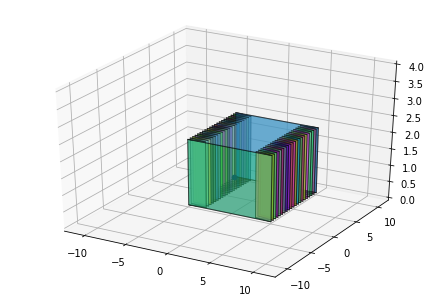

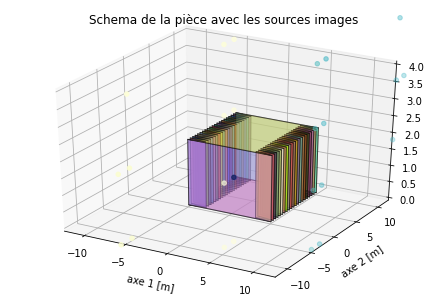

In [14]:
# Ajouter une source et un microphone
X_source = [0, 1, 1]
room.add_source(X_source, signal=signal_in)
X_micro = np.array([[0], [9], [1]])  # [[x], [y], [z]]
room.add_microphone(X_micro)
################
fig, ax = room.plot()
ax.set_xlim([-roomL - 2, roomL + 2])
ax.set_ylim([-roomH - 2, roomH + 2]);
ax.set_zlim([0, room_height+2]);
# Ajuster les paramètres du tracer de rayon
room.set_ray_tracing(receiver_radius=2, n_rays=10000, energy_thres=1e-5)

# calcule les sources images
room.image_source_model();

# trace un schema de la situation
fig, ax = room.plot(img_order=simulation_order)
plt.title('Schema de la pièce avec les sources images')
plt.xlabel('axe 1 [m]')
plt.ylabel('axe 2 [m]')
ax.set_xlim([-roomL - 2, roomL + 2])
ax.set_ylim([-roomH - 2, roomH + 2]);
ax.set_zlim([0, room_height+2]);




On remarque alors qu'il y peu de sources images provenant des côtés horizontaux de la salle ce qui est normal puisque seulement les réflexions d'odre 4 et moins sont considérées. Par la suite, différentes données sur la simulation sont calculés tels que le RT60 et le niveau sonore du signal de sortie.

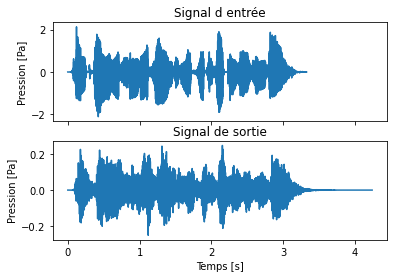

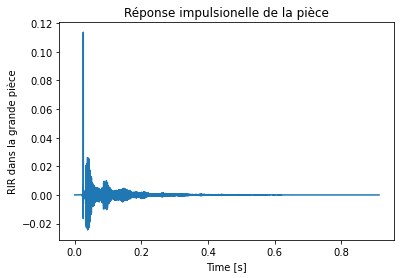

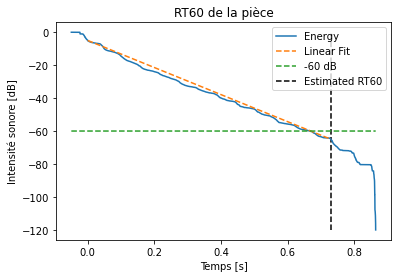

Niveau sonore du signal d'entrée =  84.28685576430313  dB
Niveau sonore du signal de sortie =  65.83244111260827  dB
Fraction de l'énergie transmise =  0.11947561298857869


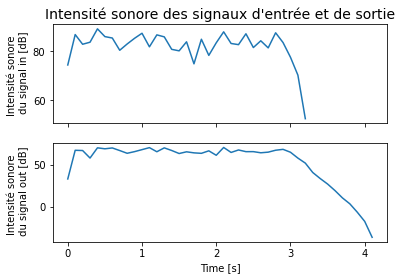

In [15]:
# Signaux d'entree et de sortie
room.simulate()

# Cette partie sert à convertir les signaux en pression réaliste. Sinon, ces vecteurs sont uniquement des fichiers .wav.
signal_in = np.array(signal_in)/1e4
signal_out = np.array(room.mic_array.signals[0, :])/2e4

# On met en graphique les signaux d'entree et de sortie
dt = 1/fs
fig, ax = plt.subplots(2, 1, sharex=True)
timeIn = np.linspace(0, dt*(len(signal_in)), len(signal_in))
ax[0].plot(timeIn, signal_in)
ax[0].set_ylabel('Pression [Pa]')
ax[0].set_title('Signal d entrée')

timeOut = np.linspace(0, dt*(len(signal_out)), len(signal_out))
ax[1].plot(timeOut, signal_out)
ax[1].set_ylabel('Pression [Pa]')
ax[1].set_title('Signal de sortie')
ax[1].set_xlabel('Temps [s]')

# faire un graphique de la RIR
plt.figure()
signal_rir = room.rir[0][0]
time = np.linspace(0, dt*(len(signal_rir)), len(signal_rir))
plt.ylabel('RIR dans la grande pièce')
plt.plot(time, signal_rir)
plt.xlabel('Time [s]');
plt.title('Réponse impulsionelle de la pièce')

# Le RT60 est une mesure du temps de réverberation de la pièce. Il équivault au temps lorsque le son est 60dB
# de moins que l'intensité sonore maximale.
plt.figure()
plt.title('RT60 de la pièce', fontsize=12)
plt.xlabel('Temps [s]')
plt.ylabel('Intensité sonore [dB]')
rt60 = room.measure_rt60(plot=True)

####################################################
ti_in = dt*len(signal_in)
ti_out = dt*len(signal_out)

p_eff_in = np.sqrt(1/ti_in*np.trapz(signal_in**2, dx=dt))
p_eff_out = np.sqrt(1/ti_out*np.trapz(signal_out**2, dx=dt))

# print(pra.utilities.rms(signal_in))

N_in = 20*np.log10(p_eff_in/(20*10**-6))
N_out = 20*np.log10(p_eff_out/(20*10**-6))

print("Niveau sonore du signal d'entrée = ", N_in, " dB")
print("Niveau sonore du signal de sortie = ", N_out, " dB")

##############################################################

fraction = p_eff_out/p_eff_in
print("Fraction de l'énergie transmise = ", fraction)

##############################################################

ti = 0.1
n_sample = int(0.1/dt)
N_in_list = []
N_out_list = []

for i in range(len(signal_in)//n_sample):
    signal_sample = signal_in[i*n_sample:(i+1)*n_sample]
    p_eff = np.sqrt(1/ti*np.trapz(signal_sample**2, dx=dt))
    N = 20*np.log10(p_eff/(20*10**-6))
    N_in_list.append(N)
    
for i in range(len(signal_out)//n_sample):
    signal_sample = signal_out[i*n_sample:(i+1)*n_sample]
    p_eff = np.sqrt(1/ti*np.trapz(signal_sample**2, dx=dt))
    N = 20*np.log10(p_eff/(20*10**-6))
    N_out_list.append(N)

time_in = np.arange(0, ti*len(N_in_list), ti)
time_out = np.arange(0, ti*len(N_out_list), ti)

fig, ax = plt.subplots(2, 1, sharex=True)

ax[0].set_ylabel("Intensité sonore \n du signal in [dB]")
ax[0].plot(time_in, N_in_list);
ax[0].set_title("Intensité sonore des signaux d'entrée et de sortie", fontsize=14)
ax[1].set_ylabel("Intensité sonore \n du signal out [dB]")
ax[1].plot(time_out, N_out_list)
ax[1].set_xlabel('Time [s]');


Par la suite, on peut comparer les sons de maniètre auditive avec IPython.

In [16]:
# original signal
print("Original :")
IPython.display.Audio(signal_in, rate=fs)

Original :


In [17]:
print("Simulated propagation to first mic:")
IPython.display.Audio(signal_out, rate=fs)

Simulated propagation to first mic:


Finalement, la simulation est refait avec une salle possédant les mêmes dimensions mais sans "spikes" afin de comparer les effets de ceux-ci.

10


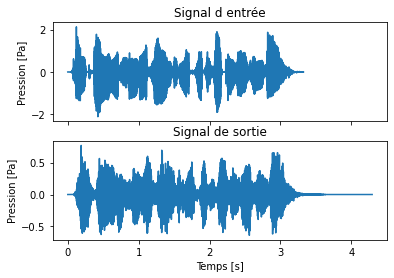

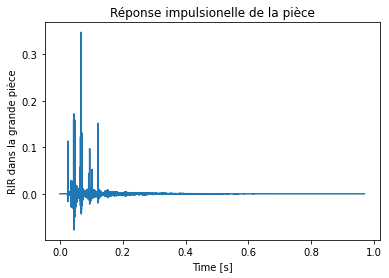

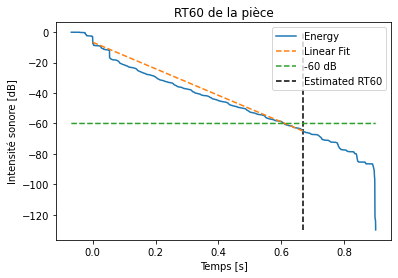

Niveau sonore du signal d'entrée =  84.28685576430313  dB
Niveau sonore du signal de sortie =  76.2531688276785  dB
Fraction de l'énergie transmise =  0.3965661610703142


In [18]:
roomH = 10
roomL = 10
Lspike = 1
Hspike = 0
coordlist = []
nspikes = int(roomH/Lspike)
print(nspikes)

for i in range(nspikes):    
    Xw = -roomL/2
    Yw = i*Lspike
    Xs = Xw + Hspike
    Ys = Yw + Lspike/2
    coordw = [Xw,Yw]
    coords = [Xs,Ys]
    coordlist.append(coordw)
    coordlist.append(coords)
    if i == (nspikes-1):    
        coordlist.append([Xw,(i+1)*Lspike])
    else:
        pass


coordlist = np.array(coordlist)
coordlist2 = coordlist.copy()
for i in range(len(coordlist)):
    coordlist2[i][0] = coordlist[i][0] * -1

coordlist2 = coordlist2[::-1]
coordt = np.asarray(np.append(coordlist,coordlist2, axis = 0))


# Je commence par définir un fichier à lire (qui est dans le dossier du code) qui donne deux informations:
# le signal et la fréquence d'echantillonage
fs, signal_in = wavfile.read("arctic_a0010.wav")

# Définir la pièce avec ses materiaux
corners = coordt.T  # [x,y]
wall_absorption = 0.2
wall_scattering = 0.1
m = pra.Material(wall_absorption, wall_scattering)

# l'ordre de la simulation est définit ici
simulation_order = 4

#création de la pièce
room = pra.Room.from_corners(corners, fs=fs, max_order=simulation_order, materials=m, ray_tracing=True, air_absorption=True)
room_height = 2
room.extrude(room_height, materials=m)


# Ajouter une source et un microphone
X_source = [0, 1, 1]
room.add_source(X_source, signal=signal_in)
X_micro = np.array([[0], [9], [1]])  # [[x], [y], [z]]
room.add_microphone(X_micro)
################

# Ajuster les paramètres du tracer de rayon
room.set_ray_tracing(receiver_radius=2, n_rays=10000, energy_thres=1e-5)

# calcule les sources images
room.image_source_model();



# Signaux d'entree et de sortie
room.simulate()

# Cette partie sert à convertir les signaux en pression réaliste. Sinon, ces vecteurs sont uniquement des fichiers .wav.
signal_in = np.array(signal_in)/1e4
signal_out = np.array(room.mic_array.signals[0, :])/2e4

# On met en graphique les signaux d'entree et de sortie
dt = 1/fs
fig, ax = plt.subplots(2, 1, sharex=True)
timeIn = np.linspace(0, dt*(len(signal_in)), len(signal_in))
ax[0].plot(timeIn, signal_in)
ax[0].set_ylabel('Pression [Pa]')
ax[0].set_title('Signal d entrée')

timeOut = np.linspace(0, dt*(len(signal_out)), len(signal_out))
ax[1].plot(timeOut, signal_out)
ax[1].set_ylabel('Pression [Pa]')
ax[1].set_title('Signal de sortie')
ax[1].set_xlabel('Temps [s]')

# faire un graphique de la RIR
plt.figure()
signal_rir = room.rir[0][0]
time = np.linspace(0, dt*(len(signal_rir)), len(signal_rir))
plt.ylabel('RIR dans la grande pièce')
plt.plot(time, signal_rir)
plt.xlabel('Time [s]');
plt.title('Réponse impulsionelle de la pièce')

# Le RT60 est une mesure du temps de réverberation de la pièce. Il équivault au temps lorsque le son est 60dB
# de moins que l'intensité sonore maximale.
plt.figure()
plt.title('RT60 de la pièce', fontsize=12)
plt.xlabel('Temps [s]')
plt.ylabel('Intensité sonore [dB]')
rt60 = room.measure_rt60(plot=True)

####################################################
ti_in = dt*len(signal_in)
ti_out = dt*len(signal_out)

p_eff_in = np.sqrt(1/ti_in*np.trapz(signal_in**2, dx=dt))
p_eff_out = np.sqrt(1/ti_out*np.trapz(signal_out**2, dx=dt))

# print(pra.utilities.rms(signal_in))

N_in = 20*np.log10(p_eff_in/(20*10**-6))
N_out = 20*np.log10(p_eff_out/(20*10**-6))

print("Niveau sonore du signal d'entrée = ", N_in, " dB")
print("Niveau sonore du signal de sortie = ", N_out, " dB")

##############################################################

fraction = p_eff_out/p_eff_in
print("Fraction de l'énergie transmise = ", fraction)

##############################################################



On peut alors comparer les deux cas. En comparant les niveaux sonores de sortie et la fraction de l'énergie transmise, il est clair que les "spikes" aident à réduire l'acoustique se propageant dans la pièce. En effet, pour la fraction de l'énergie transmise, on obtient une fraction de 0.36365495030228423 pour la salle sans "spikes" et une fraction de 0.12394058596419319 pour la salle avec les "spikes". On élimine alors près du 2/3 de l'énergie de sortie par l'ajout de ces géométries. De plus, on obtient un niveau sonore de sortie de 75.50064584110655 dB pour la salle sans "spikes" et un niveau sonore de sortie de 66.15112666567461 dB pour la salle avec spikes. Une diminution de près d'environ 10.65 dB en niveau de son est non négligeable. Le comportement des "spikes" est aussi observable dans la figure du RT60 où l'intensité décroît un peu plus rapidement dans le cas où la salle est avec "spikes". On peut aussi remarquer que les signaux d'entrée et de sorties sont de longueurs similaires dans les deux simulations.